In [488]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import pandas_profiling
import cufflinks as cf
cf.set_config_file(offline=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [489]:
df = pd.read_csv('bengal-warriors.csv',index_col=0)

In [490]:
df.head()

,OVERALL,SEASON 7,SEASON 6,SEASON 5,SEASON 4,SEASON 3,SEASON 2,SEASON 1,Team-name
SEASONS,,,,,,,,,
MATCHES PLAYED,122.0,17.0,23.0,24.0,14.0,16.0,14.0,14.0,bengal-warriors
WINS,53.0,10.0,12.0,11.0,3.0,9.0,4.0,4.0,bengal-warriors
DRAWS,15.0,3.0,2.0,6.0,2.0,0.0,1.0,1.0,bengal-warriors
LOSSES,54.0,4.0,9.0,7.0,9.0,7.0,9.0,9.0,bengal-warriors
FINISHING POSITION,0.0,2.0,2.0,1.0,8.0,4.0,6.0,7.0,bengal-warriors


In [491]:
df1 = df.transpose()

In [492]:
df2 = df1.apply(pd.to_numeric, errors='coerce')

In [521]:
df2.dtypes

SEASONS
MATCHES PLAYED          float64
WINS                    float64
DRAWS                   float64
LOSSES                  float64
FINISHING POSITION      float64
TOTAL RAIDS             float64
SUCCESSFUL RAIDS        float64
UNSUCCESSFUL RAID       float64
EMPTY RAIDS             float64
SUCCESS RAID %          float64
NO. OF SUPER RAIDS      float64
RAID TOUCH POINTS       float64
RAID BONUS POINTS       float64
TOTAL RAID POINTS       float64
TOTAL TACKLES           float64
SUCCESSFUL TACKLES      float64
UNSUCCESFUL TACKLES     float64
SUCCESSFUL TACKLE %     float64
NO. OF SUPER TACKLES    float64
ALL OUTS INFLICTED      float64
TOTAL ALL OUT POINTS    float64
TOTAL DEFENCE POINTS    float64
dtype: object

In [287]:
df2['WIN%'] = df2['WINS']/df2['MATCHES PLAYED']
df2['DRAW%'] = df2['DRAWS']/df2['MATCHES PLAYED']
df2['LOSS%'] = df2['LOSSES']/df2['MATCHES PLAYED']
df2['WIN-LOSS%'] = df2['WINS']/df2['LOSSES']


In [292]:
df2.dtypes

SEASONS
MATCHES PLAYED          float64
WINS                    float64
DRAWS                   float64
LOSSES                  float64
FINISHING POSITION      float64
TOTAL RAIDS             float64
SUCCESSFUL RAIDS        float64
UNSUCCESSFUL RAID       float64
EMPTY RAIDS             float64
SUCCESS RAID %          float64
NO. OF SUPER RAIDS      float64
RAID TOUCH POINTS       float64
RAID BONUS POINTS       float64
TOTAL RAID POINTS       float64
TOTAL TACKLES           float64
SUCCESSFUL TACKLES      float64
UNSUCCESFUL TACKLES     float64
SUCCESSFUL TACKLE %     float64
NO. OF SUPER TACKLES    float64
ALL OUTS INFLICTED      float64
TOTAL ALL OUT POINTS    float64
TOTAL DEFENCE POINTS    float64
WIN%                    float64
DRAW%                   float64
LOSS%                   float64
WIN-LOSS%               float64
UNSUCCESSFUL RAID%      float64
EMPTY RAID%             float64
AVG_RAID_TOUCH_POINT    float64
AVG_RAID_BONUS_POINT    float64
UNSUCCESSFUL TACKLE%    float64


In [290]:
df2['UNSUCCESSFUL RAID%'] = df2['UNSUCCESSFUL RAID']/df2['TOTAL RAIDS']
df2['EMPTY RAID%'] = df2['EMPTY RAIDS']/df2['TOTAL RAIDS']
df2['AVG_RAID_TOUCH_POINT'] = df2['RAID TOUCH POINTS']/df2['MATCHES PLAYED']
df2['AVG_RAID_BONUS_POINT'] = df2['RAID BONUS POINTS']/df2['MATCHES PLAYED']
df2['UNSUCCESSFUL TACKLE%'] = df2['UNSUCCESFUL TACKLES']/df2['TOTAL TACKLES']
df2['AVG_ALL_OUTS'] = df2['ALL OUTS INFLICTED']/df2['MATCHES PLAYED']

In [293]:
df6 = df2.drop(['MATCHES PLAYED','WINS','DRAWS','LOSSES','SUCCESSFUL RAIDS','UNSUCCESSFUL RAID','EMPTY RAIDS','NO. OF SUPER RAIDS','RAID TOUCH POINTS','RAID BONUS POINTS','TOTAL RAID POINTS','TOTAL TACKLES','SUCCESSFUL TACKLES','UNSUCCESFUL TACKLES','ALL OUTS INFLICTED','TOTAL ALL OUT POINTS'],axis=1)

In [296]:
df6 = df6.drop(['Team-name'],axis=0)
df6

SEASONS,FINISHING POSITION,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,0.0,5183.0,0.42,0.40,98.0,1092.0,0.434426,0.122951,0.442623,0.981481,0.217442,0.449740,13.803279,3.885246,0.637650,1.032787
SEASON 7,2.0,696.0,0.50,0.42,12.0,166.0,0.588235,0.176471,0.235294,2.500000,0.196839,0.402299,16.529412,3.941176,0.604061,1.588235
SEASON 6,2.0,963.0,0.45,0.39,16.0,200.0,0.521739,0.086957,0.391304,1.333333,0.208723,0.438214,14.826087,4.130435,0.633858,1.000000
SEASON 5,1.0,1079.0,0.42,0.37,12.0,193.0,0.458333,0.250000,0.291667,1.571429,0.206673,0.442076,13.875000,5.083333,0.652591,1.125000
SEASON 4,8.0,602.0,0.34,0.39,8.0,125.0,0.214286,0.142857,0.642857,0.333333,0.207641,0.514950,11.000000,3.428571,0.632075,0.785714
SEASON 3,4.0,702.0,0.36,0.46,13.0,150.0,0.562500,0.000000,0.437500,1.285714,0.205128,0.491453,12.750000,2.875000,0.583587,1.062500
SEASON 2,6.0,595.0,0.31,0.44,21.0,136.0,0.285714,0.071429,0.642857,0.444444,0.253782,0.521008,10.785714,2.357143,0.620915,0.714286
SEASON 1,7.0,546.0,0.52,0.32,16.0,122.0,0.285714,0.071429,0.642857,0.444444,0.267399,0.342491,15.714286,4.500000,0.721785,0.785714


In [297]:
df6.profile_report()

In [298]:
df6.corr().iplot(kind='heatmap',colorscale='ylgn')

In [173]:
df3= df2.loc['SEASON 5',:]

In [174]:
df3 

SEASONS
MATCHES PLAYED            24.00
WINS                      11.00
DRAWS                      6.00
LOSSES                     7.00
FINISHING POSITION         1.00
TOTAL RAIDS             1079.00
SUCCESSFUL RAIDS         379.00
UNSUCCESSFUL RAID        223.00
EMPTY RAIDS              477.00
SUCCESS RAID %             0.42
NO. OF SUPER RAIDS        11.00
RAID TOUCH POINTS        333.00
RAID BONUS POINTS        122.00
TOTAL RAID POINTS        455.00
TOTAL TACKLES            521.00
SUCCESSFUL TACKLES       181.00
UNSUCCESFUL TACKLES      340.00
SUCCESSFUL TACKLE %        0.37
NO. OF SUPER TACKLES      12.00
ALL OUTS INFLICTED        27.00
TOTAL ALL OUT POINTS      54.00
TOTAL DEFENCE POINTS     193.00
Name: SEASON 5, dtype: float64

In [175]:
df3.iplot(kind='bar')

In [371]:
df4 =df6.drop('FINISHING POSITION',axis=1)
df4 =df4.drop(['SEASON 7'])
df4

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,5183.0,0.42,0.40,98.0,1092.0,0.434426,0.122951,0.442623,0.981481,0.217442,0.449740,13.803279,3.885246,0.637650,1.032787
SEASON 6,963.0,0.45,0.39,16.0,200.0,0.521739,0.086957,0.391304,1.333333,0.208723,0.438214,14.826087,4.130435,0.633858,1.000000
SEASON 5,1079.0,0.42,0.37,12.0,193.0,0.458333,0.250000,0.291667,1.571429,0.206673,0.442076,13.875000,5.083333,0.652591,1.125000
SEASON 4,602.0,0.34,0.39,8.0,125.0,0.214286,0.142857,0.642857,0.333333,0.207641,0.514950,11.000000,3.428571,0.632075,0.785714
SEASON 3,702.0,0.36,0.46,13.0,150.0,0.562500,0.000000,0.437500,1.285714,0.205128,0.491453,12.750000,2.875000,0.583587,1.062500
SEASON 2,595.0,0.31,0.44,21.0,136.0,0.285714,0.071429,0.642857,0.444444,0.253782,0.521008,10.785714,2.357143,0.620915,0.714286
SEASON 1,546.0,0.52,0.32,16.0,122.0,0.285714,0.071429,0.642857,0.444444,0.267399,0.342491,15.714286,4.500000,0.721785,0.785714


In [372]:
df5 = df6['FINISHING POSITION']
df5 = df5.drop(['SEASON 7'],axis=0)
df5

OVERALL     0.0
SEASON 6    2.0
SEASON 5    1.0
SEASON 4    8.0
SEASON 3    4.0
SEASON 2    6.0
SEASON 1    7.0
Name: FINISHING POSITION, dtype: float64

In [373]:
df4

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,5183.0,0.42,0.40,98.0,1092.0,0.434426,0.122951,0.442623,0.981481,0.217442,0.449740,13.803279,3.885246,0.637650,1.032787
SEASON 6,963.0,0.45,0.39,16.0,200.0,0.521739,0.086957,0.391304,1.333333,0.208723,0.438214,14.826087,4.130435,0.633858,1.000000
SEASON 5,1079.0,0.42,0.37,12.0,193.0,0.458333,0.250000,0.291667,1.571429,0.206673,0.442076,13.875000,5.083333,0.652591,1.125000
SEASON 4,602.0,0.34,0.39,8.0,125.0,0.214286,0.142857,0.642857,0.333333,0.207641,0.514950,11.000000,3.428571,0.632075,0.785714
SEASON 3,702.0,0.36,0.46,13.0,150.0,0.562500,0.000000,0.437500,1.285714,0.205128,0.491453,12.750000,2.875000,0.583587,1.062500
SEASON 2,595.0,0.31,0.44,21.0,136.0,0.285714,0.071429,0.642857,0.444444,0.253782,0.521008,10.785714,2.357143,0.620915,0.714286
SEASON 1,546.0,0.52,0.32,16.0,122.0,0.285714,0.071429,0.642857,0.444444,0.267399,0.342491,15.714286,4.500000,0.721785,0.785714


In [374]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X = df4
y= df5
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape


(7, 8)

In [375]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['FEATURES','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

                FEATURES         Score
0            TOTAL RAIDS  12381.410134
4   TOTAL DEFENCE POINTS   2634.391477
3   NO. OF SUPER TACKLES    231.967391
8              WIN-LOSS%      1.673772
11  AVG_RAID_TOUCH_POINT      1.557564


[0.08333333 0.08333333 0.05       0.1        0.05       0.01666667
 0.08333333 0.03333333 0.08333333 0.03333333 0.06666667 0.1
 0.03333333 0.1        0.08333333]


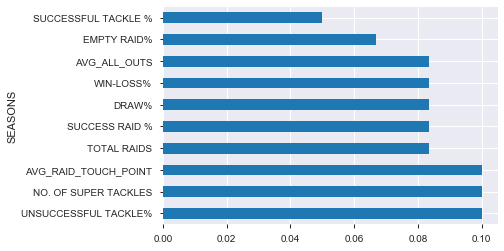

In [376]:
#Feature Importance 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [385]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model,12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['SUCCESS RAID %', 'SUCCESSFUL TACKLE %', 'NO. OF SUPER TACKLES', 'WIN%',
       'DRAW%', 'LOSS%', 'WIN-LOSS%', 'UNSUCCESSFUL RAID%', 'EMPTY RAID%',
       'AVG_RAID_TOUCH_POINT', 'UNSUCCESSFUL TACKLE%', 'AVG_ALL_OUTS'],
      dtype='object')


In [386]:
X_features = df4.filter(['SUCCESS RAID %', 'SUCCESSFUL TACKLE %', 'NO. OF SUPER TACKLES', 'WIN%',
       'DRAW%', 'LOSS%', 'WIN-LOSS%', 'UNSUCCESSFUL RAID%', 'EMPTY RAID%',
       'AVG_RAID_TOUCH_POINT', 'UNSUCCESSFUL TACKLE%', 'AVG_ALL_OUTS'],axis=1)
X_features.shape

(7, 12)

In [387]:
import os
os.environ['KERAS_BACKEND'] = 'theano'
import keras as ks


In [388]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [392]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [393]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [394]:
# fit the keras model on the dataset
model.fit(X_features, y, epochs=150, batch_size=10)

Epoch 1/150
7/7 [==============================] - 0s 6ms/step - loss: -2.3665 - acc: 0.1429
Epoch 2/150
7/7 [==============================] - 0s 8ms/step - loss: -2.5136 - acc: 0.1429
Epoch 3/150
7/7 [==============================] - 0s 6ms/step - loss: -2.6606 - acc: 0.1429
Epoch 4/150
7/7 [==============================] - 0s 6ms/step - loss: -2.8082 - acc: 0.1429
Epoch 5/150
7/7 [==============================] - 0s 6ms/step - loss: -2.9562 - acc: 0.1429
Epoch 6/150
7/7 [==============================] - 0s 9ms/step - loss: -3.1045 - acc: 0.1429
Epoch 7/150
7/7 [==============================] - 0s 8ms/step - loss: -3.2358 - acc: 0.1429
Epoch 8/150
7/7 [==============================] - 0s 7ms/step - loss: -3.3685 - acc: 0.1429
Epoch 9/150
7/7 [==============================] - 0s 6ms/step - loss: -3.5131 - acc: 0.1429
Epoch 10/150
7/7 [==============================] - 0s 6ms/step - loss: -3.6604 - acc: 0.1429
Epoch 11/150
7/7 [==============================] - 0s 8ms/step - los

Epoch 88/150
7/7 [==============================] - 0s 5ms/step - loss: -20.4588 - acc: 0.1429
Epoch 89/150
7/7 [==============================] - 0s 5ms/step - loss: -20.8106 - acc: 0.1429
Epoch 90/150
7/7 [==============================] - 0s 4ms/step - loss: -21.1663 - acc: 0.1429
Epoch 91/150
7/7 [==============================] - 0s 5ms/step - loss: -21.5262 - acc: 0.1429
Epoch 92/150
7/7 [==============================] - 0s 5ms/step - loss: -21.8904 - acc: 0.1429
Epoch 93/150
7/7 [==============================] - 0s 6ms/step - loss: -22.2586 - acc: 0.1429
Epoch 94/150
7/7 [==============================] - 0s 5ms/step - loss: -22.6306 - acc: 0.1429
Epoch 95/150
7/7 [==============================] - 0s 4ms/step - loss: -23.0071 - acc: 0.1429
Epoch 96/150
7/7 [==============================] - 0s 4ms/step - loss: -23.3876 - acc: 0.1429
Epoch 97/150
7/7 [==============================] - 0s 5ms/step - loss: -23.7735 - acc: 0.1429
Epoch 98/150
7/7 [==============================] 

In [384]:
# evaluate the keras model
_, accuracy = model.evaluate(X_features, y)
print('Accuracy: %.2f' % (accuracy*100))

7/7 [==============================] - 0s 855us/step
Accuracy: 14.29


In [395]:
f_select = ['SUCCESS RAID %', 'SUCCESSFUL TACKLE %', 'NO. OF SUPER TACKLES', 'WIN%',
       'DRAW%', 'LOSS%', 'WIN-LOSS%', 'UNSUCCESSFUL RAID%', 'EMPTY RAID%',
       'AVG_RAID_TOUCH_POINT', 'UNSUCCESSFUL TACKLE%', 'AVG_ALL_OUTS']
f_select

['SUCCESS RAID %',
 'SUCCESSFUL TACKLE %',
 'NO. OF SUPER TACKLES',
 'WIN%',
 'DRAW%',
 'LOSS%',
 'WIN-LOSS%',
 'UNSUCCESSFUL RAID%',
 'EMPTY RAID%',
 'AVG_RAID_TOUCH_POINT',
 'UNSUCCESSFUL TACKLE%',
 'AVG_ALL_OUTS']

In [423]:
#Using PCA to transform and decouple the dataset defined by the selected features
from sklearn.decomposition import PCA
pca = PCA()  
XX = pca.fit_transform(X[f_select]) # XX is out new training matrix that has two basis vectors
XX

array([[ 7.17165441e+01,  3.40461376e-02, -2.90679893e-02,
         1.16129808e-02, -1.00791397e-02,  1.39775568e-03,
         1.46863185e-15],
       [-1.02718638e+01, -1.70627119e+00, -2.50600798e-01,
        -5.09875817e-02,  3.68380139e-02,  3.07570477e-02,
         1.46863185e-15],
       [-1.42791982e+01, -8.30719418e-01, -6.32503801e-01,
         1.61038642e-01,  6.20516252e-03, -1.41689711e-02,
         1.46863185e-15],
       [-1.83043720e+01,  2.16286691e+00,  3.39991160e-01,
         7.63799658e-02, -4.80317387e-02,  1.88137925e-02,
         1.46863185e-15],
       [-1.32888360e+01,  3.35204478e-01, -4.88665605e-01,
        -1.57242629e-01, -4.37137066e-02, -1.21912278e-02,
         1.46863185e-15],
       [-5.30657609e+00,  2.47305062e+00,  2.21558203e-01,
        -3.37592999e-02,  6.71848732e-02, -1.14710816e-02,
         1.46863185e-15],
       [-1.02656980e+01, -2.46817754e+00,  8.39288830e-01,
        -7.04207793e-03, -8.40346450e-03, -1.31373154e-02,
         1.4686318

In [420]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [446]:
df6

SEASONS,FINISHING POSITION,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,0.0,5183.0,0.42,0.40,98.0,1092.0,0.434426,0.122951,0.442623,0.981481,0.217442,0.449740,13.803279,3.885246,0.637650,1.032787
SEASON 7,2.0,696.0,0.50,0.42,12.0,166.0,0.588235,0.176471,0.235294,2.500000,0.196839,0.402299,16.529412,3.941176,0.604061,1.588235
SEASON 6,2.0,963.0,0.45,0.39,16.0,200.0,0.521739,0.086957,0.391304,1.333333,0.208723,0.438214,14.826087,4.130435,0.633858,1.000000
SEASON 5,1.0,1079.0,0.42,0.37,12.0,193.0,0.458333,0.250000,0.291667,1.571429,0.206673,0.442076,13.875000,5.083333,0.652591,1.125000
SEASON 4,8.0,602.0,0.34,0.39,8.0,125.0,0.214286,0.142857,0.642857,0.333333,0.207641,0.514950,11.000000,3.428571,0.632075,0.785714
SEASON 3,4.0,702.0,0.36,0.46,13.0,150.0,0.562500,0.000000,0.437500,1.285714,0.205128,0.491453,12.750000,2.875000,0.583587,1.062500
SEASON 2,6.0,595.0,0.31,0.44,21.0,136.0,0.285714,0.071429,0.642857,0.444444,0.253782,0.521008,10.785714,2.357143,0.620915,0.714286
SEASON 1,7.0,546.0,0.52,0.32,16.0,122.0,0.285714,0.071429,0.642857,0.444444,0.267399,0.342491,15.714286,4.500000,0.721785,0.785714


In [453]:
X_train = X
y_train =y 
X_test = df6.drop(['SEASON 6','SEASON 5','SEASON 4','SEASON 3','SEASON 2','SEASON 1','OVERALL'],axis=0)
X_test = X_test.drop(['FINISHING POSITION'], axis=1)
y_test = df6['FINISHING POSITION']
y_test = y_test.drop(['SEASON 6','SEASON 5','SEASON 4','SEASON 3','SEASON 2','SEASON 1','OVERALL'],axis=0)

In [454]:
X_test

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
SEASON 7,696.0,0.5,0.42,12.0,166.0,0.588235,0.176471,0.235294,2.5,0.196839,0.402299,16.529412,3.941176,0.604061,1.588235


In [455]:
y_test

SEASON 7    2.0
Name: FINISHING POSITION, dtype: float64

In [482]:
# machine learning
from sklearn.svm import SVC
from sklearn import preprocessing
#import fancyimpute
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#  Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Models
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [483]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True) # Change verbose to True if you want to see it train

[13:32:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4.19446	validation_1-rmse:1.04
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:3.88613	validation_1-rmse:0.6168
[2]	validation_0-rmse:3.60449	validation_1-rmse:0.227456
[3]	validation_0-rmse:3.34735	validation_1-rmse:0.130741
[4]	validation_0-rmse:3.1056	validation_1-rmse:0.234629
[5]	validation_0-rmse:2.88244	validation_1-rmse:0.331591
[6]	validation_0-rmse:2.67651	validation_1-rmse:0.422089
[7]	validation_0-rmse:2.48892	validation_1-rmse:0.500985
[8]	validation_0-rmse:2.31631	validation_1-rmse:0.74485
[9]	validation_0-rmse:2.15395	validation_1-rmse:0.815449
[10]	validation_0-rmse:2.00443	validation_1-rmse:0.881342
[11]	validation_0-rmse:1.86685	validation_1-rmse:0.942842

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [484]:
pred  = pd.DataFrame()
pred['MW_Prediction'] = reg.predict(X_test)

In [485]:
pred['MW_Prediction']

0    2.13074
Name: MW_Prediction, dtype: float32

In [486]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
rmse

0.13074040412902832

In [487]:
predict = reg.predict(X_test)
predictions = [round(value) for value in predict]
predictions

[2.0]

### Finding the win-loss ratio of the team for season 7

In [508]:
df6.loc['SEASON 7','WIN-LOSS%']

2.5

## Finding the successful Raid %(successful raid/ total raid) for season 7

In [516]:
SUCC_RAID =df2.loc['SEASON 7','SUCCESSFUL RAIDS']
TOT_RAID = df2.loc['SEASON 7','TOTAL RAIDS']

SUCC_RAID_PERC = SUCC_RAID/TOT_RAID
SUCC_RAID_PERC

0.40086206896551724

## Finding the OVERALL successful Raid %(successful raid/ total raid) of a team

In [518]:
SUCC_RAID_OV =df2.loc['OVERALL','SUCCESSFUL RAIDS']
TOT_RAID_OV = df2.loc['OVERALL','TOTAL RAIDS']

SUCC_RAID_PERC_OV = SUCC_RAID_OV/TOT_RAID_OV
SUCC_RAID_PERC_OV

0.332818830792977

## Finding the Super-performance total of the team

In [529]:
SUPER_RAIDS = df2.loc['SEASON 7','NO. OF SUPER RAIDS']
SUPER_TACKLES = df2.loc['SEASON 7','NO. OF SUPER TACKLES']
All_OUTS_INFLICTED = df2.loc['SEASON 7','ALL OUTS INFLICTED']
All_OUTS_CONCEDED = 16

SPT = SUPER_RAIDS+SUPER_TACKLES+All_OUTS_INFLICTED-All_OUTS_CONCEDED
SPT

36.0